# Word clouds

The dataset here comprises of comments made on articles in New York Times in Jan-April 2018 and Jan-April 2017. To get a glimpse of the textual features in the data, we plot the most frequent words using word clouds.

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df1 = pd.read_csv('CommentsJan2017.csv')

In [4]:
df2 = pd.read_csv('CommentsFeb2017.csv')

In [5]:
df3 = pd.read_csv('CommentsApril2017.csv')

In [6]:
df4 = pd.read_csv('CommentsJan2018.csv')

In [7]:
df5 = pd.read_csv('CommentsFeb2018.csv')

In [8]:
df6 = pd.read_csv('CommentsApril2018.csv')

In [20]:
comments  = pd.concat([df1, df2, df3, df4, df5, df6])

In [21]:
comments.drop_duplicates(subset='commentID', inplace=True)

In [22]:
comments.shape

(1261288, 34)

There are approximately 1261288 comments in total with 34 features. We look at the statistics of only categorical/textual features.

In [23]:
comments.describe(include='O').transpose()

,count,unique,top,freq
articleID,1261288,5515,58b0894195d0e0247463875e,6024
commentBody,1261288,1256716,Well said.,112
commentTitle,1218866,1,<br/>,1218866
commentType,1261288,3,comment,926185
newDesk,1261288,42,OpEd,444043
parentUserDisplayName,334949,43076,Richard Luettgen,2277
permID,1261279,1261256,25487083,2
picURL,1261288,8403,https://graphics8.nytimes.com/images/apps/time...,1053811
sectionName,1261288,54,Unknown,739927
status,1261288,1,approved,1261288


In [37]:
a1 = pd.read_csv('ArticlesJan2017.csv')

In [38]:
a2 = pd.read_csv('ArticlesFeb2017.csv')

In [39]:
a3 = pd.read_csv('ArticlesMarch2017.csv')

In [40]:
a4 = pd.read_csv('ArticlesApril2017.csv')

In [41]:
a5 = pd.read_csv('ArticlesMay2017.csv')

In [42]:
a6 = pd.read_csv('ArticlesJan2018.csv')

In [43]:
a7 = pd.read_csv('ArticlesFeb2018.csv')

In [44]:
a8 = pd.read_csv('ArticlesMarch2018.csv')

In [45]:
a9 = pd.read_csv('ArticlesApril2018.csv')

In [46]:
articles = pd.concat([a1, a2, a3, a4, a5, a6, a7, a8, a9])

In [47]:
articles.drop_duplicates(subset='articleID', inplace=True)

In [48]:
articles.shape

(8681, 16)

There are approximately 8681 articles in total with 16 features. We look at the statistics of only categorical/textual features.

In [49]:
articles.describe(include='O').transpose()

,count,unique,top,freq
abstract,167,162,Photos by The New York Times and by photograph...,4
articleID,8681,8681,58d3777c7c459f247805d7bc,1
byline,8681,2755,By DEB AMLEN,256
documentType,8681,2,article,8514
headline,8681,7755,Unknown,671
keywords,8681,7282,[],555
newDesk,8681,44,OpEd,1621
pubDate,8681,7892,2017-03-03 08:21:25,8
sectionName,8681,61,Unknown,5957
snippet,8681,8369,"Look closely at this image, stripped of its ca...",27


The following function generates a word cloud.

In [24]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    


In [25]:
comments_text = str(comments.commentBody)

In [26]:
comments_mask = np.array(Image.open('comment.png'))

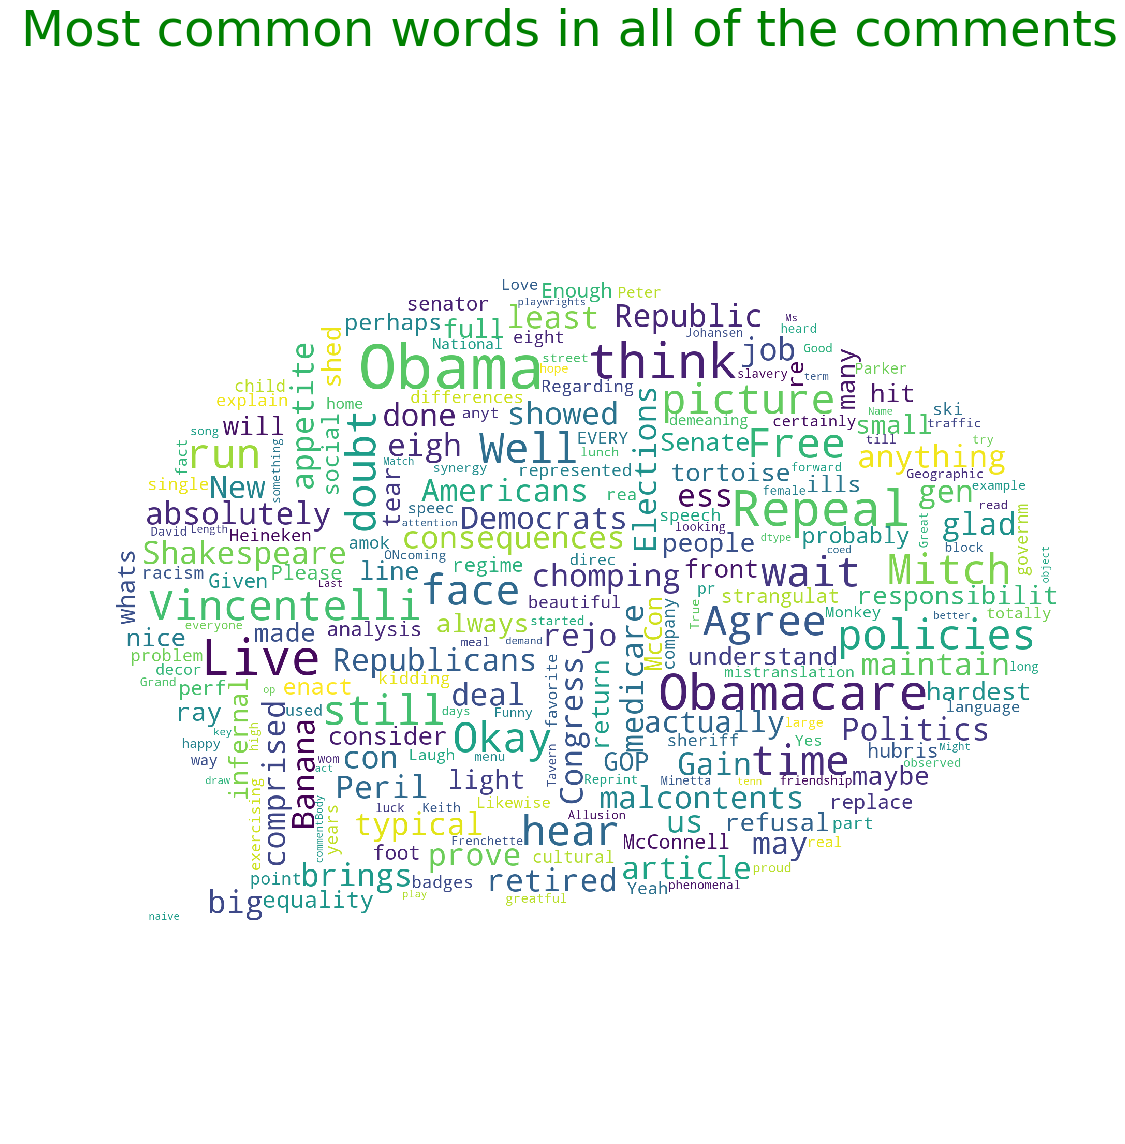

In [27]:
plot_wordcloud(comments_text, comments_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

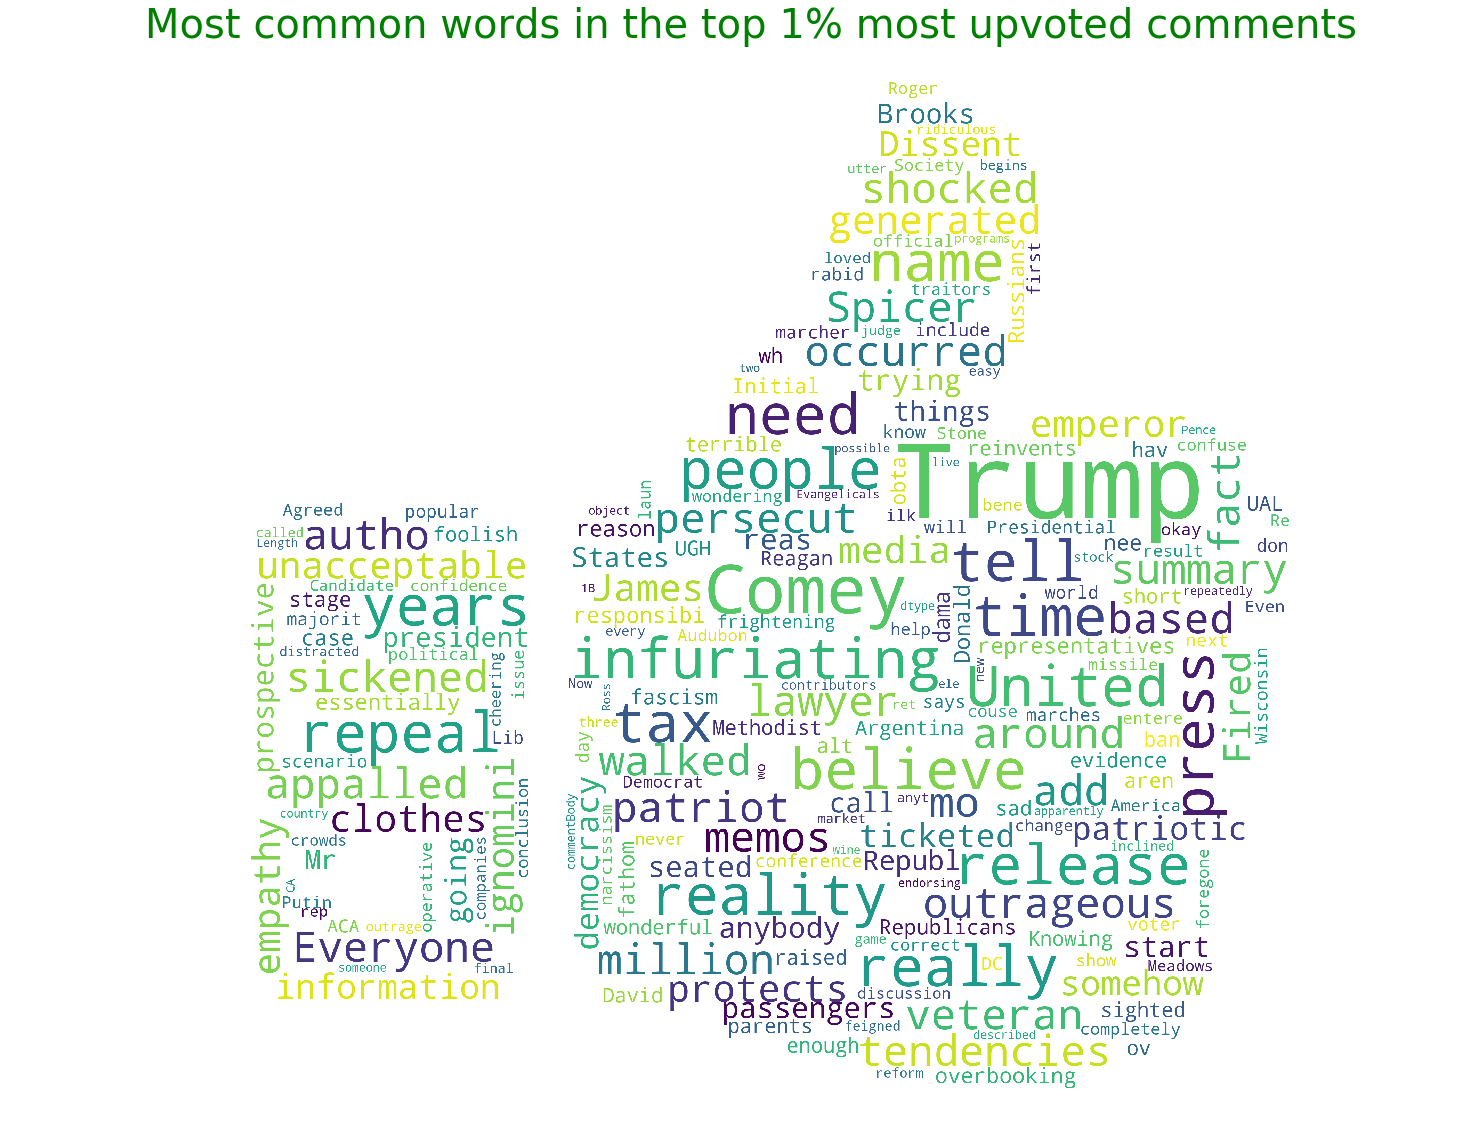

In [28]:
n = round(df.shape[0]*0.01)
top_recommended_comments_text = str(df.nlargest(n, columns='recommendations').commentBody)
upvote_mask = np.array(Image.open('upvote.png'))
plot_wordcloud(top_recommended_comments_text, upvote_mask, max_words=300000, max_font_size=300,
               title = 'Most common words in the top 1% most upvoted comments')

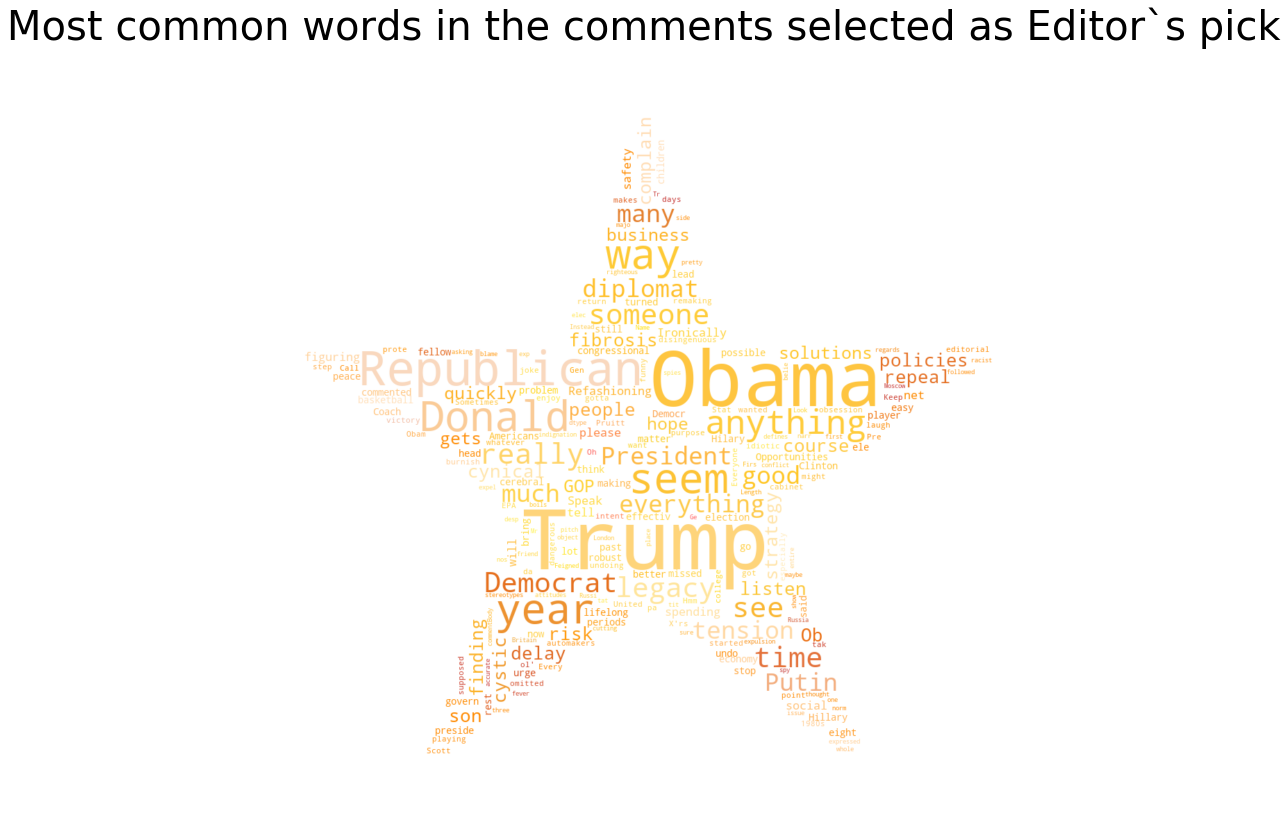

In [29]:
editorsPick_comments_text = str(comments.loc[comments.editorsSelection==1, 'commentBody'])
star_mask = np.array(Image.open('star.png'))
plot_wordcloud(editorsPick_comments_text, star_mask, max_words=8000, max_font_size=120, figure_size=(16,14),
               title = 'Most common words in the comments selected as Editor`s pick', image_color=True)

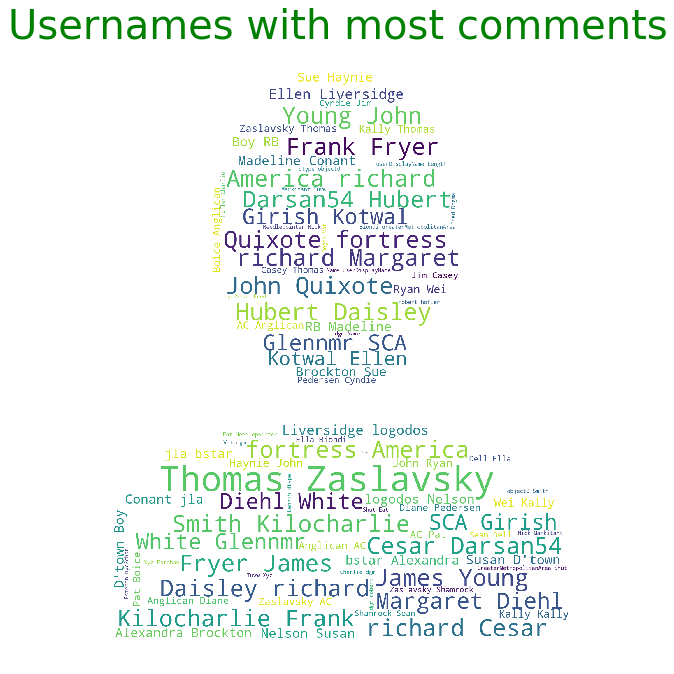

In [30]:
userDisplayNames = str(comments.userDisplayName)*800
user_mask = np.array(Image.open('user.png'))
plot_wordcloud(userDisplayNames, user_mask, max_words=1200, max_font_size=120, figure_size=(10,12), title = 'Usernames with most comments')

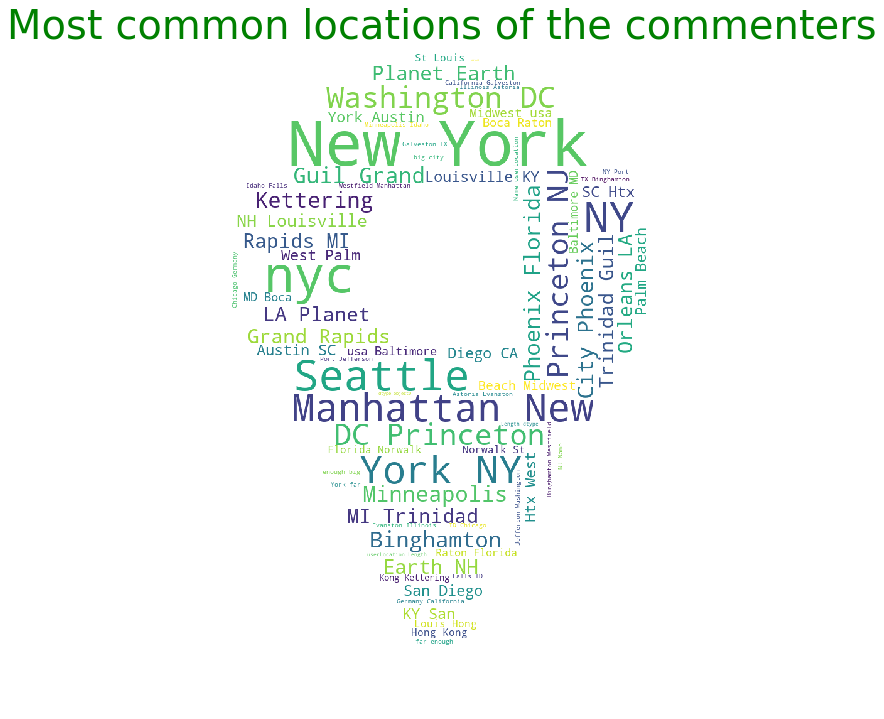

In [31]:
userLocations = str(comments.userLocation)*5
loc_mask = np.array(Image.open('loc.png'))
plot_wordcloud(userLocations, loc_mask, max_words=800, max_font_size=100, figure_size=(12,18),
               title = 'Most common locations of the commenters')

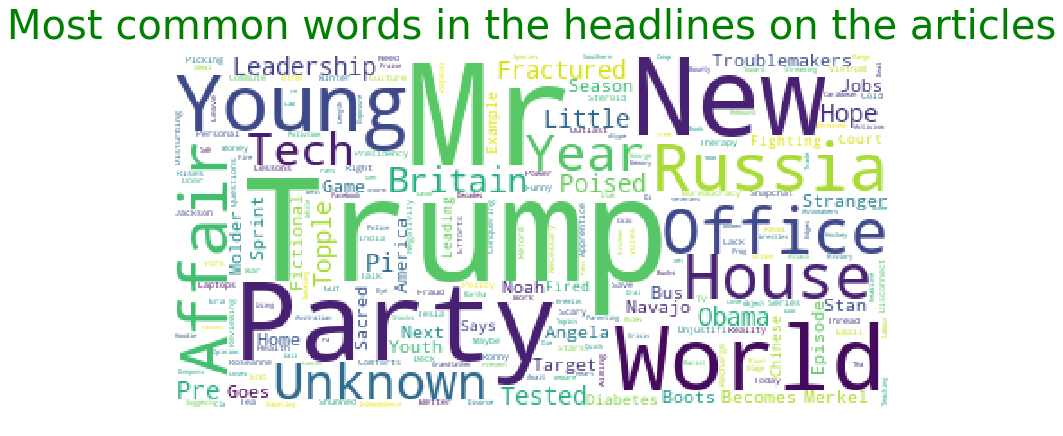

In [50]:
headlines = str(articles.headline)
plot_wordcloud(headlines, max_words=800, max_font_size=80, figure_size=(14,10),
               title = 'Most common words in the headlines on the articles')